In [3]:
from dadac import *
import matplotlib.pyplot as plt
import numpy as np

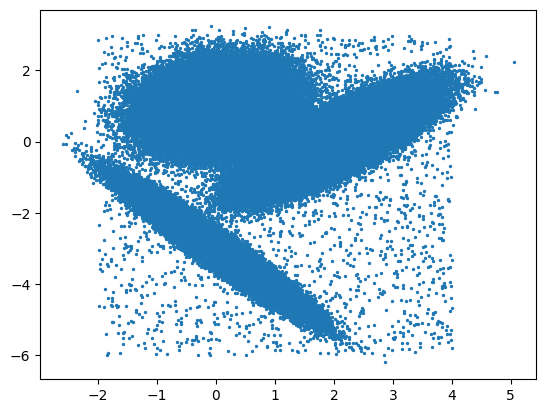

In [4]:
n = 100000
d1 = np.random.multivariate_normal([0,1],cov = 0.3*np.array([[1,0.2],[0.2,1]]), size = n)
d2 = np.random.multivariate_normal([0,-3],cov = 0.5*np.array([[0.7,-0.8],[-0.8,1]]), size = n*2)
d3 = np.random.multivariate_normal([2,0],cov = 0.4*np.array([[1,0.75],[0.75,0.9]]), size = n*2)
d4 = np.array([np.random.uniform(-2,4,2000), np.random.uniform(-6,3,2000)]).T

d = np.concatenate([d1,d2,d3,d4])
plt.scatter(d[:,0], d[:,1], s = 2)

In [5]:
data = Data(d)
data.computeNeighbors_vptree(200)
data.computeIDtwoNN()
data.computeDensity()
data.computeClusteringADP(Z = 3)

Building the vp tree v2
	Total time: 1.258s

KNN search:
	Total time: 1.827s

ID estimation:
	ID value: 1.998764
	Total time: 0.184s

Density and k* estimation:
	Total time: 1.818s

H1: Preliminary cluster assignment
	Finding putative centers: 0.071s
	Finding actual centers:   0.244s
	Tentative clustering:     0.057s
	Finalizing clustering:    0.000s

	Found 573 clusters
	Total time: 0.372s

H2: Finding border points
	Total time: 0.310s

Using dense implementation
H3: Merging clusters
	Finding merges:   0.000s
	Cluster merging:  0.003s
	Final operations: 0.005s

	Found 1460 possible merges
	Surviving clusters 3
	Total time: 0.008s



In [1]:
clusterLabels = data.getClusterAssignment()

for cl in set(clusterLabels):
    #print(cl)
    mask = np.where(clusterLabels == cl)
    if cl != -1:
        plt.scatter(data.data[mask,0], data.data[mask,1], s = 2)
    else:
        plt.scatter(data.data[mask,0], data.data[mask,1], s = 2, c = 'lightgray')
plt.title("Cluster assignment")
plt.show()
#plt.legend()

NameError: name 'data' is not defined

In [2]:
density = data.getDensity()
plt.scatter(data.data[:,0],data.data[:,1], s = 2, c = density)
plt.title("Density profile")

NameError: name 'data' is not defined

In [24]:
bins = 100
h = np.histogram2d(d[:,0], d[:,1], [bins, bins])

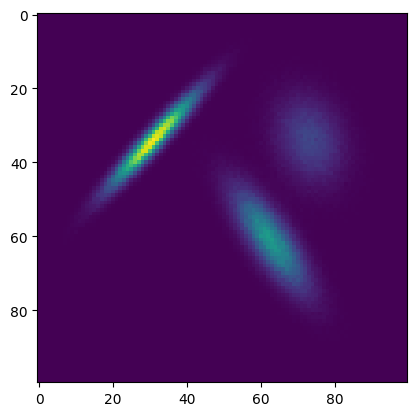

In [25]:
plt.imshow(h[0])